---
## **Trabalhando com Dados de Estações Meteorológicas do INMET**

---


**OBJETIVO:** Aprender como baixar e trabalhar com dados de **Estações Meteorológicas de Superfície (EMS)** do INMET. Para isto será utilizado a blioteca HydroBr. O [`HydroBr`](https://github.com/hydrobr/hydrobr) é um pacote criado pelo engenheiro [Wallisson Carvalho](https://wallissoncarvalho.github.io/about/) e é feito para quem trabalha com séries temporais hidrometeorológicas das estações da **Agência Nacional de Águas** (ANA), do **Instituto Nacional de Meteorologia** (INMET) e do **Operador Nacional do Sistema Elétrico** (ONS).

---


**DADOS DE ENTRADA**: Arquivos texto de estações meteorológicas.

- **Tipo do dado:** tabela
- **Formato do dado:** arquivo TEXTO
- **Nome do arquivo:** Não tem
- **Fonte dos dados:** INMET


---

**DADOS DE SAÍDA:** Figura e arquivo CSV
- **Tipo do dado:** Figura e tabela
- **Formato do dado:** arquivo JPG e CSV
- **Imagens geradas:**
    1. Fig1a_horario_climatologia_precipitacao.jpg
    2. Fig1b_horario_climatologia_radiacao_temperatura.jpg
    3. Fig2_diario_precipitacao.jpg
    4. Fig3a_mensal_precipitacao.jpg
    5. Fig3b_mensal_climatologia_precipitacao.jpg
    6. Fig4_anual_precipitacao.jpg
    7. tabela_mensal.csv



---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:

1.   Instação das bibliotecas **hydrobr** e **proplot**
2.   Importação das biblotecas
3.   Download e tratamento dos dados
4.   Plotar gráfico do **ciclo horário**
5.   Plotar gráfico do **ciclo diário**
6.   Plotar gráfico do **ciclo mensal**
7.   Plotar gráfico do **ciclo anual**
8.   Salvar os dados em arquivo **csv**


---

- **Todas** as estações retornam as seguintes variáveis:
    1. T: Temperatura (Tinst, Tmax e Tmin) [C]
    2. RH: Umidade Relativa (RHins, RHmax e RHmin) [%];
    3. DP: Temperatura do Ponto de Orvalho (DPinst, DPmax, DPmin) [C]
    4. P: Pressão Atmosférica (Pinst, Pmax, Pmin) [hPa]
    5. Wspeed: Velocidade do Vento [m/s]
    6. Wdir: Direção do Vento [º]
    7. Rad: Radiação [kJ/m²]
    8. Prec: Precipitação [mm]



---




**OBSERVAÇÕES IMPORTANTES**:
1. Mudar o caminho para o do seu drive.
2. Escolher a estação de superfície pelo **código**.



---


- **Realizado por:** [Willy Hagi](https://taggo.one/willyhagi) da Meteonorte
- **Atualizado por:** Enrique V. Mattos - 21/11/2022

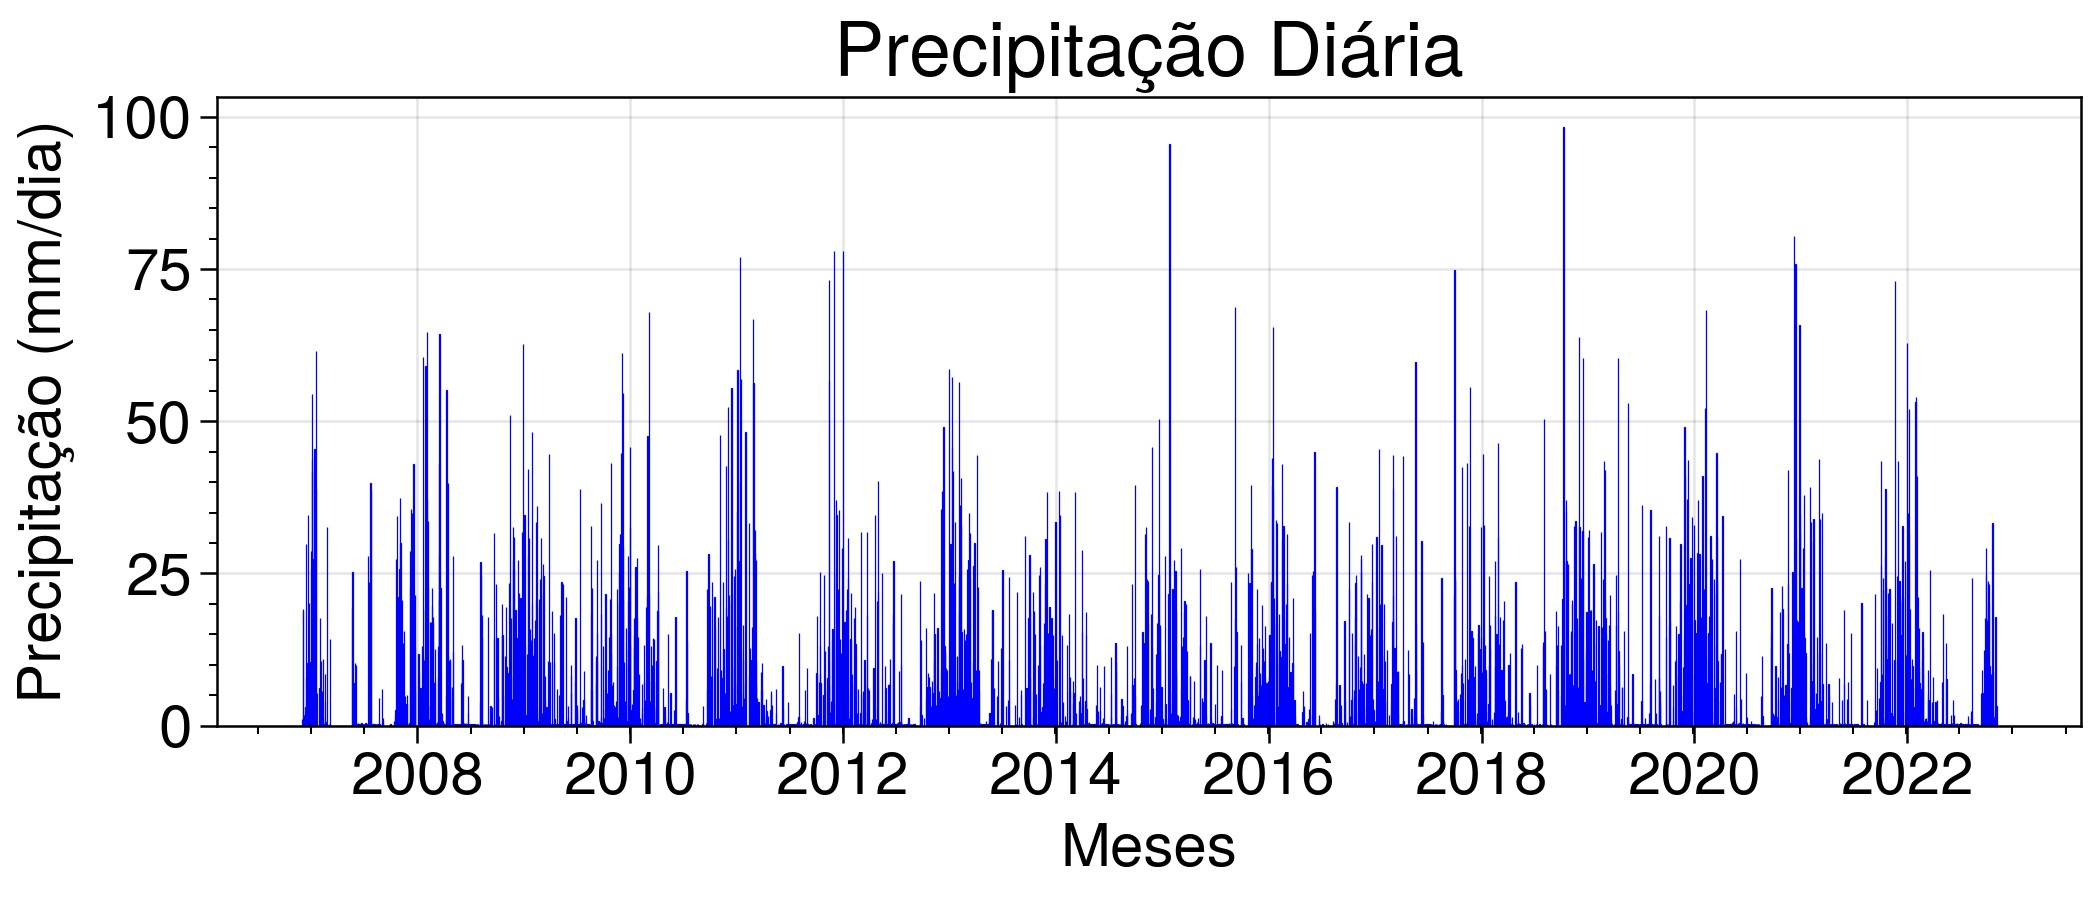

# **1° Passo:** Instalando o `HydroBr` e `Proplot`

In [1]:
# Instalando a biblioteca proplot, utilizada para gerar gráficos.
!pip install -q proplot

Chegando aqui, será necessário fazer a tediosa **Reinicialização do Ambiente de Execução** (acessar *Ambiente de execução* que esta na barra de ferramentas e clicar em *Reiniciar Ambiente de Execução* e rodar novamente a célula anterior de instalações) e ter que instalar todos os pacotes de novo. Isso é necessário para poder usar sem problemas o `Proplot` na nossa sessão do Colab. Então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

In [2]:
# Instalando a biblioteca hydrobr que baixa os dados das estações meteorológicas.
#!pip install hydrobr
!pip install git+https://github.com/wallissoncarvalho/hydrobr.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **2° Passo:** Importando Bibliotecas

In [3]:
import numpy as np              # NumPy: trabalha com arrays
import pandas as pd             # Pandas: trabalha com tabelas
import hydrobr                  # HydroBr: baixa dados das Estações Meteorológicas de Superfície (EMS)
import matplotlib.pyplot as plt # Matplotlib: o fundamento de toda a criação de gráficos em Python
import proplot as plot          # Proplot: pacote de visualização de gráficos e mapas com dados meteorológicos em alto nível
import plotly.offline           # Plotly: faz gráficos interativos
import pytz                     # Pytz: transforma hora UTC para hora local
import seaborn as sns           # Seaborn: trabalha com gráficos estatísticos

# vamos ignorar avisos
import warnings
warnings.filterwarnings("ignore")

# **3° Passo:** Montando drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **4° Passo:** Caminho do diretório

In [5]:
# nome do diretório
dir = '/content/drive/MyDrive/PYHTON/00_GITHUB/3_ESTACOES_METEOROLOGICAS/'

In [6]:
# cria a pasta de saídade com o nome "output"
import os
os.makedirs(f'{dir}output/', exist_ok=True)

# **PARTE 1):** Baixando os dados de uma estação do INMET

**Lista os nomes das estações do INMET**

In [7]:
lista_ems = hydrobr.get_data.INMET.list_stations(station_type='automatic')

In [8]:
lista_ems

,Code,Type,Name,State,Latitude,Longitude,Height,Start Operation,End Operation
0,A422,Automatic,ABROLHOS,BA,-17.96305555,-38.70333333,20.93,2008-07-20 21:00:00-03:00,In operation
1,A360,Automatic,ACARAU,CE,-3.1211111,-40.08722221,67.15,2009-04-21 21:00:00-03:00,In operation
2,A657,Automatic,AFONSO CLAUDIO,ES,-20.10416666,-41.10694444,507.48,2011-09-23 21:00:00-03:00,In operation
3,A908,Automatic,AGUA BOA,MT,-14.01638888,-52.21166666,440,2006-12-15 21:00:00-03:00,In operation
4,A756,Automatic,AGUA CLARA,MS,-20.44444444,-52.87583332,323.63,2010-08-13 21:00:00-03:00,In operation
...,...,...,...,...,...,...,...,...,...
562,A612,Automatic,VITORIA,ES,-20.27083332,-40.30583333,9,2006-10-30 21:00:00-03:00,In operation
563,A414,Automatic,VITORIA DA CONQUISTA,BA,-14.88638888,-40.80138888,879.38,2007-05-31 21:00:00-03:00,In operation
564,A858,Automatic,XANXERE,SC,-26.938666,-52.39809,878.74,2008-03-14 21:00:00-03:00,In operation
565,A247,Automatic,XINGUARA,PA,-7.11055555,-49.9261111,245,2016-09-10 21:00:00-03:00,In operation


**Mostrando apenas a coluna dos Estados (`State`)**

In [9]:
lista_ems['State']

0      BA
1      CE
2      ES
3      MT
4      MS
       ..
562    ES
563    BA
564    SC
565    PA
566    MA
Name: State, Length: 567, dtype: object

**Agrupando por Estado**
- Um jeito fácil de filtrar a tabela por Estado é com o uso do famoso comando `groupby()` do `Pandas`. Com isso, vamos agrupar todas as EMS do país de acordo com seus Estados e atribuir essa nova tabela a outra variável.

In [10]:
ems_por_estado = lista_ems.groupby('State')

In [11]:
ems_por_estado

**Vamos visualizar a chaves de todos os grupos criados**

In [12]:
ems_por_estado.groups.keys()

dict_keys(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'])

- uma forma alternativa, seria utilizando a função **unique**

In [13]:
lista_ems['State'].unique()

array(['BA', 'CE', 'ES', 'MT', 'MS', 'DF', 'MG', 'RS', 'TO', 'PA', 'GO',
       'MA', 'PI', 'RJ', 'RN', 'AM', 'SE', 'AL', 'SC', 'PE', 'PB', 'RO',
       'SP', 'RR', 'PR', 'AC', 'AP'], dtype=object)

**Extraindo a tabela das estações de Minas Gerais (`MG`)**

In [14]:
ems_mg = ems_por_estado.get_group('MG')

In [15]:
ems_mg

,Code,Type,Name,State,Latitude,Longitude,Height,Start Operation,End Operation
6,A549,Automatic,AGUAS VERMELHAS,MG,-15.751536,-41.457787,754.07,2007-09-08 21:00:00-03:00,In operation
7,A534,Automatic,AIMORES,MG,-19.53277777,-41.09083333,287.74,2007-08-04 21:00:00-03:00,In operation
12,A508,Automatic,ALMENARA,MG,-16.16666666,-40.68777777,189.11,2002-12-14 22:00:00-02:00,In operation
29,A566,Automatic,ARACUAI,MG,-16.84888888,-42.03527777,308,2017-05-18 21:00:00-03:00,In operation
36,A505,Automatic,ARAXA,MG,-19.60583333,-46.94972221,1018.32,2002-12-18 22:00:00-02:00,In operation
...,...,...,...,...,...,...,...,...,...
542,A568,Automatic,UBERABA,MG,-19.71,-47.96194444,778,2017-05-18 21:00:00-03:00,In operation
543,A507,Automatic,UBERLANDIA,MG,-18.91694443,-48.25555555,874.77,2002-12-17 22:00:00-02:00,In operation
545,A542,Automatic,UNAI,MG,-16.55416666,-46.88194443,640.85,2007-06-15 21:00:00-03:00,In operation
555,A515,Automatic,VARGINHA,MG,-21.56638888,-45.40416666,949.78,2006-07-12 21:00:00-03:00,In operation


**Contabilizando a quantidade de estações automáticas em MG**: função `len`

In [16]:
len(ems_mg)

68

**Visualizando os nomes da estações de MG**

In [17]:
nome_estacoes_mg = list(ems_mg['Name'])

In [18]:
nome_estacoes_mg

['AGUAS VERMELHAS',
 'AIMORES',
 'ALMENARA',
 'ARACUAI',
 'ARAXA',
 'BAMBUI',
 'BARBACENA',
 'BELO HORIZONTE (PAMPULHA)',
 'BELO HORIZONTE - CERCADINHO',
 'BURITIS',
 'CALDAS',
 'CAMPINA VERDE',
 'CAPELINHA',
 'CARATINGA',
 'CHAPADA GAUCHA',
 'CONCEICAO DAS ALAGOAS',
 'CORONEL PACHECO',
 'CURVELO',
 'DIAMANTINA',
 'DIVINOPOLIS',
 'DORES DO INDAIA',
 'ESPINOSA',
 'FLORESTAL',
 'FORMIGA',
 'GOVERNADOR VALADARES',
 'GUANHAES',
 'GUARDA-MOR',
 'IBIRITE (ROLA MOCA)',
 'ITAOBIM',
 'ITUIUTABA',
 'JANUARIA',
 'JOAO PINHEIRO',
 'JUIZ DE FORA',
 'MACHADO',
 'MANHUACU',
 'MANTENA',
 'MARIA DA FE',
 'MOCAMBINHO',
 'MONTALVANIA',
 'MONTE VERDE',
 'MONTES CLAROS',
 'MURIAE',
 'NOVA PORTEIRINHA (JANAUBA)',
 'OLIVEIRA',
 'OURO BRANCO',
 'PARACATU',
 'PASSA QUATRO',
 'PASSOS',
 'PATOS DE MINAS',
 'PATROCINIO',
 'PIRAPORA',
 'POMPEU',
 'RIO PARDO DE MINAS',
 'SACRAMENTO',
 'SALINAS',
 'SAO JOAO DEL REI',
 'SAO ROMAO',
 'SAO SEBASTIAO DO PARAISO',
 'SERRA DOS AIMORES',
 'SETE LAGOAS',
 'TEOFILO OTONI',
 

**Buscando o código da estação de 'MARIA DA FÉ'**

In [19]:
ems_mg.loc[ ems_mg['Name'] == 'MONTALVANIA' ]

,Code,Type,Name,State,Latitude,Longitude,Height,Start Operation,End Operation
321,A526,Automatic,MONTALVANIA,MG,-14.40833333,-44.40416666,519.52,2007-06-25 21:00:00-03:00,In operation


In [20]:
ems_mg.loc[ ems_mg['Name'] == 'MARIA DA FE' ]['Code']

309    A531
Name: Code, dtype: object

In [21]:
codigo = ems_mg.loc[ ems_mg['Name'] == 'MARIA DA FE' ]['Code']

In [22]:
print(codigo)

309    A531
Name: Code, dtype: object


**Baixando os dados da estação de 'MARIA DA FE'**

In [23]:
dados = hydrobr.get_data.INMET.hourly_data('A526')

  0%|          | 0/98 [00:00<?, ?it/s]


Exception: ignored

In [ ]:
dados

**Utilizando a coluna de índices (nesse exemplo são as datas) para selecionar um tempo específico**: função `loc`

In [ ]:
# selecionando os dados do dia 01, mês 12, ano 2006 às 17 h 00 min e 00 seg
dados.loc['2006-12-01 17:00:00']

In [ ]:
# selecionado desta data/horário apenas a coluna de radiação ("Rad")
dados.loc['2006-12-01 17:00:00']['Rad']

In [ ]:
# selecionado desta data/horário as colunas de radiação ("Rad"), precipitação("Prec") e Temperatura do ponto do orvalho máxima ("DPmax")
dados.loc['2006-12-01 17:00:00'][['Rad','Prec', 'DPmax']]

In [ ]:
# selecionando um intervalo de tempo. Neste exemplo estamos selecionado das 17 às 20 horas UTC
dados.loc['2006-12-01 17:00:00': '2006-12-01 20:00:00']

**Verificando o período de dados**:
- Vamos criar um gráfico de **Gantt**, que vai nos mostrar a disponibilidade dos dados horários da EMS ao longo do tempo. Esse tipo de gráfico é super útil para mostrar "buracos" nos dados.

In [ ]:
plotly.offline.init_notebook_mode(connected=True)

# criar gráfico de gantt
gantt = hydrobr.Plot.gantt(dados)

# formatação dos eixos
gantt.update_layout(xaxis_title='Ano',
                    yaxis_title ='Variáveis',
                    title='Gráfico de Gantt - EMS Automática de Patrocínio (MG)')

# mostrar o gráfico no colab
plotly.offline.plot(gantt)
gantt.show(renderer="colab")

# **PARTE 2):**  Tratamento dos dados: DataFrames com `Pandas`. Nesta etapa são criadas as seguintes variáveis:
* 1. horaria_climatologica
* 2. diaria
* 3. mensal
* 4. mensal_climatologia
* 5. anual

**Visualizando a tabela de dados e as datas em formato de índices**

In [ ]:
dados

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2006-12-01 17:00:00,24.0,25.0,23.2,57.0,62.0,56.0,15.0,16.6,14.8,874.1,874.5,874.0,0.7,209.0,5.1,1006.0,0.0
2006-12-01 18:00:00,23.1,NaN,NaN,64.0,NaN,NaN,15.9,NaN,NaN,873.7,NaN,NaN,2.4,152.0,NaN,490.4,1.0
2006-12-01 19:00:00,22.3,23.5,22.2,63.0,65.0,59.0,15.0,15.7,14.5,873.5,873.7,873.5,1.7,147.0,5.0,1399.8,0.0
2006-12-01 20:00:00,21.2,22.9,20.9,67.0,69.0,62.0,14.8,15.6,14.3,873.5,873.5,873.4,2.7,149.0,6.1,833.4,0.0
2006-12-01 21:00:00,19.7,21.4,19.7,71.0,72.0,65.0,14.4,14.7,14.2,873.7,873.8,873.5,2.1,138.0,6.4,562.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-21 19:00:00,23.7,26.9,23.7,47.0,50.0,39.0,11.8,13.4,11.3,872.7,873.2,872.7,1.6,109.0,4.7,1599.1,0.0
2022-11-21 20:00:00,20.2,23.7,20.1,72.0,73.0,44.0,15.1,15.2,10.4,872.8,872.8,872.6,0.6,240.0,3.5,247.6,0.0
2022-11-21 21:00:00,18.8,21.5,18.8,74.0,74.0,62.0,14.1,15.8,13.8,873.0,873.0,872.8,0.7,275.0,2.6,179.4,0.0
2022-11-21 22:00:00,17.8,18.8,17.8,81.0,81.0,74.0,14.5,14.6,13.7,873.5,873.6,873.0,0.1,203.0,1.7,-0.1,0.0


In [ ]:
# para mostrar os nomes dos índices:
dados.index

DatetimeIndex(['2006-12-01 17:00:00', '2006-12-01 18:00:00',
               '2006-12-01 19:00:00', '2006-12-01 20:00:00',
               '2006-12-01 21:00:00', '2006-12-01 22:00:00',
               '2006-12-01 23:00:00', '2006-12-02 00:00:00',
               '2006-12-02 01:00:00', '2006-12-02 02:00:00',
               ...
               '2022-11-21 14:00:00', '2022-11-21 15:00:00',
               '2022-11-21 16:00:00', '2022-11-21 17:00:00',
               '2022-11-21 18:00:00', '2022-11-21 19:00:00',
               '2022-11-21 20:00:00', '2022-11-21 21:00:00',
               '2022-11-21 22:00:00', '2022-11-21 23:00:00'],
              dtype='datetime64[ns]', length=140023, freq='H')

In [ ]:
# para mostrar os nomes das colunas:
dados.columns

Index(['Tins', 'Tmax', 'Tmin', 'RHins', 'RHmax', 'RHmin', 'DPins', 'DPmax',
       'DPmin', 'Pins', 'Pmax', 'Pmin', 'Wspeed', 'Wdir', 'Wgust', 'Rad',
       'Prec'],
      dtype='object')

**Convertendo de `Hora UTC` para `Hora Local`**

1.   **Para converter** os horários, precisamos primeiro "dizer" para o `pytz` que esses tempos estão em UTC. Isso é feito com `.tz_localize(pytz.utc)`:
2.   Depois faremos a conversão com `tz_convert()` de acordo com o fuso-horário local. Para **Mária da Fé**, podemos usar o mesmo fuso de São Paulo com `pytz.timezone('America/Sao_Paulo')`.
3.  O `pytz` possui uma lista extensa de horários ao longo do globo, o que vai ser muito útil para a nossa conversão.



In [ ]:
# mostrar todos os fusos-horários
pytz.all_timezones

In [ ]:
dados = dados.set_index(dados.index.tz_localize(pytz.utc).tz_convert(pytz.timezone('America/Sao_Paulo')))

In [ ]:
dados

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2006-12-01 15:00:00-02:00,24.0,25.0,23.2,57.0,62.0,56.0,15.0,16.6,14.8,874.1,874.5,874.0,0.7,209.0,5.1,1006.0,0.0
2006-12-01 16:00:00-02:00,23.1,NaN,NaN,64.0,NaN,NaN,15.9,NaN,NaN,873.7,NaN,NaN,2.4,152.0,NaN,490.4,1.0
2006-12-01 17:00:00-02:00,22.3,23.5,22.2,63.0,65.0,59.0,15.0,15.7,14.5,873.5,873.7,873.5,1.7,147.0,5.0,1399.8,0.0
2006-12-01 18:00:00-02:00,21.2,22.9,20.9,67.0,69.0,62.0,14.8,15.6,14.3,873.5,873.5,873.4,2.7,149.0,6.1,833.4,0.0
2006-12-01 19:00:00-02:00,19.7,21.4,19.7,71.0,72.0,65.0,14.4,14.7,14.2,873.7,873.8,873.5,2.1,138.0,6.4,562.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-21 16:00:00-03:00,23.7,26.9,23.7,47.0,50.0,39.0,11.8,13.4,11.3,872.7,873.2,872.7,1.6,109.0,4.7,1599.1,0.0
2022-11-21 17:00:00-03:00,20.2,23.7,20.1,72.0,73.0,44.0,15.1,15.2,10.4,872.8,872.8,872.6,0.6,240.0,3.5,247.6,0.0
2022-11-21 18:00:00-03:00,18.8,21.5,18.8,74.0,74.0,62.0,14.1,15.8,13.8,873.0,873.0,872.8,0.7,275.0,2.6,179.4,0.0
2022-11-21 19:00:00-03:00,17.8,18.8,17.8,81.0,81.0,74.0,14.5,14.6,13.7,873.5,873.6,873.0,0.1,203.0,1.7,-0.1,0.0


In [ ]:
dados.index

DatetimeIndex(['2006-12-01 15:00:00-02:00', '2006-12-01 16:00:00-02:00',
               '2006-12-01 17:00:00-02:00', '2006-12-01 18:00:00-02:00',
               '2006-12-01 19:00:00-02:00', '2006-12-01 20:00:00-02:00',
               '2006-12-01 21:00:00-02:00', '2006-12-01 22:00:00-02:00',
               '2006-12-01 23:00:00-02:00', '2006-12-02 00:00:00-02:00',
               ...
               '2022-11-21 11:00:00-03:00', '2022-11-21 12:00:00-03:00',
               '2022-11-21 13:00:00-03:00', '2022-11-21 14:00:00-03:00',
               '2022-11-21 15:00:00-03:00', '2022-11-21 16:00:00-03:00',
               '2022-11-21 17:00:00-03:00', '2022-11-21 18:00:00-03:00',
               '2022-11-21 19:00:00-03:00', '2022-11-21 20:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', length=140023, freq='H')

**Convertendo os dados para formato numérico**
- Repare que os dados abaixo estão no formato `object`. Mas para fazer cálculos precisamos tranformá-los para formato numérico (`numeric`).

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140023 entries, 2006-12-01 15:00:00-02:00 to 2022-11-21 20:00:00-03:00
Freq: H
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Tins    137397 non-null  float64
 1   Tmax    137386 non-null  float64
 2   Tmin    137386 non-null  float64
 3   RHins   137397 non-null  float64
 4   RHmax   137386 non-null  float64
 5   RHmin   137384 non-null  float64
 6   DPins   137394 non-null  float64
 7   DPmax   137386 non-null  float64
 8   DPmin   137380 non-null  float64
 9   Pins    137397 non-null  float64
 10  Pmax    137386 non-null  float64
 11  Pmin    137386 non-null  float64
 12  Wspeed  137395 non-null  float64
 13  Wdir    137395 non-null  float64
 14  Wgust   137384 non-null  float64
 15  Rad     137291 non-null  float64
 16  Prec    137382 non-null  float64
dtypes: float64(17)
memory usage: 19.2 MB


In [ ]:
dados = dados.apply(pd.to_numeric, errors='coerce')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140023 entries, 2006-12-01 15:00:00-02:00 to 2022-11-21 20:00:00-03:00
Freq: H
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Tins    137397 non-null  float64
 1   Tmax    137386 non-null  float64
 2   Tmin    137386 non-null  float64
 3   RHins   137397 non-null  float64
 4   RHmax   137386 non-null  float64
 5   RHmin   137384 non-null  float64
 6   DPins   137394 non-null  float64
 7   DPmax   137386 non-null  float64
 8   DPmin   137380 non-null  float64
 9   Pins    137397 non-null  float64
 10  Pmax    137386 non-null  float64
 11  Pmin    137386 non-null  float64
 12  Wspeed  137395 non-null  float64
 13  Wdir    137395 non-null  float64
 14  Wgust   137384 non-null  float64
 15  Rad     137291 non-null  float64
 16  Prec    137382 non-null  float64
dtypes: float64(17)
memory usage: 23.3 MB


**Agrupando os dados por hora, dia, mês e ano**

In [ ]:
# ---------------------------------------------------------- #
#                          HORÁRIA
# ---------------------------------------------------------- #
# climatológica
horaria_climatologica = dados.groupby(dados.index.hour).mean()

# ---------------------------------------------------------- #
#                          DIÁRIA
# ---------------------------------------------------------- #
# total
diaria = dados.groupby(pd.Grouper(freq='1D')).mean()
diaria['Prec'] = dados['Prec'].groupby(pd.Grouper(freq='1D')).sum()

# ---------------------------------------------------------- #
#                          MENSAL
# ---------------------------------------------------------- #
# total
mensal = dados.groupby(pd.Grouper(freq='1M')).mean()
mensal['Prec'] = dados['Prec'].groupby(pd.Grouper(freq='1M')).sum()

# climatológica
mensal_climatologia = mensal.groupby(mensal.index.month).mean()

# ---------------------------------------------------------- #
#                          ANUAL
# ---------------------------------------------------------- #
# total
anual = dados.groupby(pd.Grouper(freq='1Y')).mean()
anual['Prec'] = dados['Prec'].groupby(pd.Grouper(freq='1Y')).sum()

In [ ]:
dados

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2006-12-01 15:00:00-02:00,24.0,25.0,23.2,57.0,62.0,56.0,15.0,16.6,14.8,874.1,874.5,874.0,0.7,209.0,5.1,1006.0,0.0
2006-12-01 16:00:00-02:00,23.1,NaN,NaN,64.0,NaN,NaN,15.9,NaN,NaN,873.7,NaN,NaN,2.4,152.0,NaN,490.4,1.0
2006-12-01 17:00:00-02:00,22.3,23.5,22.2,63.0,65.0,59.0,15.0,15.7,14.5,873.5,873.7,873.5,1.7,147.0,5.0,1399.8,0.0
2006-12-01 18:00:00-02:00,21.2,22.9,20.9,67.0,69.0,62.0,14.8,15.6,14.3,873.5,873.5,873.4,2.7,149.0,6.1,833.4,0.0
2006-12-01 19:00:00-02:00,19.7,21.4,19.7,71.0,72.0,65.0,14.4,14.7,14.2,873.7,873.8,873.5,2.1,138.0,6.4,562.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-21 16:00:00-03:00,23.7,26.9,23.7,47.0,50.0,39.0,11.8,13.4,11.3,872.7,873.2,872.7,1.6,109.0,4.7,1599.1,0.0
2022-11-21 17:00:00-03:00,20.2,23.7,20.1,72.0,73.0,44.0,15.1,15.2,10.4,872.8,872.8,872.6,0.6,240.0,3.5,247.6,0.0
2022-11-21 18:00:00-03:00,18.8,21.5,18.8,74.0,74.0,62.0,14.1,15.8,13.8,873.0,873.0,872.8,0.7,275.0,2.6,179.4,0.0
2022-11-21 19:00:00-03:00,17.8,18.8,17.8,81.0,81.0,74.0,14.5,14.6,13.7,873.5,873.6,873.0,0.1,203.0,1.7,-0.1,0.0


In [ ]:
horaria_climatologica

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
0,13.434768,14.082345,13.060315,93.527384,94.635696,91.886089,12.354873,12.891601,12.028504,876.693526,876.971689,876.629729,0.330009,187.235521,1.863167,-3.148887,0.204446
1,13.225397,13.855913,12.850445,93.931354,94.919301,92.398079,12.215511,12.737328,11.878026,876.359983,876.741031,876.323039,0.316349,188.782707,1.818900,-3.129414,0.165479
2,13.015743,13.631190,12.651529,94.332168,95.181199,92.915953,12.077861,12.591246,11.734789,875.980045,876.396558,875.944575,0.308387,191.416565,1.783715,-3.114161,0.152709
3,12.781340,13.400787,12.433928,94.779643,95.536027,93.445960,11.923662,12.443984,11.587705,875.689105,876.019972,875.636097,0.296362,193.632039,1.714673,-3.100158,0.152458
4,12.545229,13.156326,12.205383,95.284691,95.915589,94.024642,11.776669,12.291070,11.433432,875.607585,875.787050,875.490353,0.271042,194.015379,1.639671,-3.081723,0.143122
5,12.355540,12.946103,12.000052,95.726319,96.316498,94.587557,11.663090,12.172754,11.308441,875.778871,875.843446,875.517878,0.258441,195.555225,1.575603,-2.786099,0.123859
6,12.331532,12.842183,11.851731,95.965547,96.614026,94.991256,11.677894,12.133403,11.213064,876.190993,876.217803,875.744701,0.250087,194.066807,1.541098,9.718167,0.113661
7,13.554450,13.726526,12.031684,94.091275,96.576499,93.480853,12.554975,12.776552,11.385155,876.702815,876.724480,876.169155,0.324602,150.541528,1.687987,151.619584,0.101014
8,16.603020,16.700332,13.472927,85.737825,94.445453,84.978356,14.014784,14.501361,12.320300,877.171636,877.199145,876.689073,0.666853,106.647233,2.400576,591.257619,0.098813
9,18.983936,19.209448,16.500437,74.682207,86.623297,73.128537,14.132064,15.151886,13.302672,877.514510,877.562609,877.139521,1.162598,104.731273,3.574397,1288.485123,0.087286


In [ ]:
diaria

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2006-12-01 00:00:00-02:00,19.900000,20.650000,19.337500,70.555556,73.125000,67.750000,14.288889,14.750000,13.900000,874.244444,874.412500,874.025000,1.833333,114.111111,5.550000,478.833333,1.0
2006-12-02 00:00:00-02:00,18.429167,19.291667,17.470833,77.208333,81.500000,73.000000,13.916667,14.612500,13.237500,874.950000,875.200000,874.745833,1.050000,121.708333,3.591667,1268.058333,0.0
2006-12-03 00:00:00-02:00,20.012500,20.975000,19.320833,78.958333,82.708333,74.625000,15.895833,16.537500,15.295833,874.754167,874.962500,874.554167,1.100000,143.333333,3.704167,933.254167,0.0
2006-12-04 00:00:00-02:00,20.326087,21.047826,19.621739,82.695652,86.086957,79.434783,17.095652,17.713043,16.569565,874.460870,874.743478,874.217391,1.539130,139.173913,4.991304,682.465217,18.8
2006-12-05 00:00:00-02:00,17.973684,18.526316,17.652632,92.947368,95.000000,89.578947,16.784211,17.242105,16.442105,875.163158,875.384211,875.021053,0.700000,148.210526,3.168421,377.447368,19.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-17 00:00:00-03:00,17.229167,18.166667,16.312500,74.333333,79.000000,69.541667,12.079167,13.050000,11.104167,875.383333,875.595833,875.204167,0.725000,202.958333,2.491667,1323.829167,0.0
2022-11-18 00:00:00-03:00,16.887500,17.875000,16.004167,78.333333,82.208333,74.333333,12.700000,13.675000,12.037500,874.887500,875.108333,874.658333,0.625000,164.208333,2.450000,1019.687500,0.0
2022-11-19 00:00:00-03:00,17.287500,18.070833,16.483333,76.041667,80.250000,71.916667,12.345833,13.254167,11.400000,875.479167,875.700000,875.245833,0.533333,167.333333,2.454167,1179.670833,0.0
2022-11-20 00:00:00-03:00,17.812500,19.000000,16.787500,76.875000,81.458333,71.916667,13.279167,14.150000,12.612500,875.650000,875.837500,875.454167,0.562500,177.875000,3.112500,884.983333,0.0


In [ ]:
mensal

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2006-12-31 00:00:00-02:00,19.438292,20.107080,18.830236,84.855670,88.209440,81.407080,16.602209,17.203392,16.091150,874.401620,874.632743,874.174484,1.089691,146.518409,3.857080,761.489691,202.0
2007-01-31 00:00:00-02:00,18.980396,19.491287,18.520990,90.843564,93.354455,87.952475,17.320000,17.797228,16.859208,873.254455,873.473861,873.016040,0.859208,172.340594,3.595446,504.189109,429.6
2007-02-28 00:00:00-03:00,19.380581,20.188022,18.646824,82.838475,86.529946,78.711434,16.060254,16.734301,15.391107,874.390381,874.595463,874.174229,0.892922,152.647913,3.471869,799.253358,100.4
2007-03-31 00:00:00-03:00,18.925862,19.988793,18.143966,78.051724,82.284483,72.991379,14.362931,15.317241,13.581897,877.681897,877.875862,877.473276,0.619828,175.939655,2.745690,918.156897,14.4
2007-04-30 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 00:00:00-03:00,12.899328,13.950134,11.935887,79.233871,82.333333,75.991935,8.558199,9.394355,7.826344,878.988844,879.186828,878.798925,0.395699,207.510753,1.665995,657.548790,6.6
2022-08-31 00:00:00-03:00,13.991801,14.926075,13.122312,73.936828,77.400538,70.442204,8.582392,9.306452,7.952957,878.285618,878.503360,878.063844,0.497849,178.698925,2.408199,638.323656,29.4
2022-09-30 00:00:00-03:00,15.901669,16.782197,15.086092,76.454798,79.873435,72.901252,10.995410,11.633241,10.393602,876.560501,876.802225,876.322114,0.537830,164.432545,2.620862,664.507371,128.2
2022-10-31 00:00:00-03:00,18.216801,19.050606,17.440511,80.600806,83.954240,76.928668,14.253898,15.009556,13.527725,875.544758,875.810363,875.289367,0.576613,174.490591,2.897577,785.729435,212.8


In [ ]:
mensal_climatologia

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
1,19.502896,20.214124,18.857897,84.406131,87.477923,81.081824,16.476595,17.133767,15.888973,874.612085,874.841012,874.382879,0.782960,162.883376,3.232809,719.167619,291.0125
2,19.500769,20.261134,18.809260,83.464592,86.679030,80.022438,16.271171,16.954063,15.659621,874.898739,875.128766,874.673816,0.746700,163.617510,3.102180,734.973858,192.6625
3,18.843326,19.625574,18.142023,84.041864,87.125883,80.670094,15.751274,16.439452,15.136319,875.437133,875.658443,875.216696,0.665953,172.515851,2.802451,718.722456,162.7875
4,16.822513,17.636198,16.074778,84.295863,87.242389,81.169299,13.780824,14.509868,13.128045,876.186034,876.391448,875.981372,0.587330,191.574922,2.427371,676.875061,68.3750
5,13.708305,14.525310,12.946166,85.452457,88.193286,82.521779,10.913405,11.652952,10.233127,877.119802,877.330292,876.911582,0.533954,201.812938,2.255257,553.938082,51.8875
6,13.006424,13.872090,12.203245,85.025616,87.788158,82.072380,10.105622,10.877817,9.393352,878.587811,878.787855,878.387564,0.543672,203.913234,2.262938,535.111749,40.3250
7,12.576552,13.513306,11.707704,80.747768,83.872015,77.456378,8.661643,9.464188,7.927486,879.161593,879.361799,878.964050,0.605321,199.449784,2.403895,595.973526,36.3625
8,14.097137,15.058837,13.191649,76.135231,79.726106,72.417624,9.074284,9.886134,8.323537,878.672327,878.888264,878.461391,0.721410,185.708705,2.776373,696.950445,38.8250
9,16.820469,17.769718,15.930020,72.984154,76.738357,69.109723,10.974314,11.749381,10.252378,877.219493,877.461516,876.986839,0.846601,173.886149,3.264684,780.565087,79.8625
10,18.314948,19.128674,17.548922,77.940660,81.387249,74.339589,13.778445,14.484939,13.130406,875.340773,875.594629,875.096340,0.878369,162.912168,3.474024,749.864367,145.3625


In [ ]:
anual

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2006-12-31 00:00:00-02:00,19.438292,20.107080,18.830236,84.855670,88.209440,81.407080,16.602209,17.203392,16.091150,874.401620,874.632743,874.174484,1.089691,146.518409,3.857080,761.489691,202.0
2007-12-31 00:00:00-02:00,16.514470,17.364936,15.716506,79.267641,82.824060,75.463320,12.250295,12.978474,11.556077,876.185919,876.422459,875.955580,0.891156,181.433012,3.263578,723.216801,1344.4
2008-12-31 00:00:00-02:00,16.251701,17.028748,15.525939,82.968265,86.180843,79.515926,12.897934,13.603962,12.241226,875.612968,875.846192,875.390113,0.851655,176.524543,3.048841,683.047557,2000.4
2009-12-31 00:00:00-02:00,16.856060,17.600801,16.162619,84.992331,87.934073,81.786311,13.984571,14.658212,13.355614,875.527824,875.750944,875.308630,0.804601,181.156118,3.022971,675.152455,2113.6
2010-12-31 00:00:00-02:00,16.709649,17.541327,15.934727,80.939934,84.195272,77.459404,12.866016,13.583682,12.188478,875.860215,876.084150,875.641430,0.842926,176.914126,3.110426,725.503383,1495.2
2011-12-31 00:00:00-02:00,16.482793,17.310523,15.712169,80.723606,83.869401,77.370358,12.603405,13.322726,11.935638,875.524109,875.744755,875.309072,0.823069,180.668761,3.122920,703.326782,1732.8
2012-12-31 00:00:00-02:00,16.719590,17.554300,15.940996,81.065148,84.269507,77.686980,12.944317,13.682264,12.258765,876.369772,876.589304,876.150541,0.781344,175.478474,3.073721,732.611940,1389.2
2013-12-31 00:00:00-02:00,16.434265,17.216378,15.711980,83.540082,86.507044,80.354599,13.219858,13.915187,12.588421,876.129707,876.354621,875.908567,0.727886,176.989693,2.954021,688.067579,1908.2
2014-12-31 00:00:00-02:00,16.958169,17.849715,16.135510,78.120105,81.660996,74.477849,12.434079,13.211978,11.739667,876.807821,877.027472,876.591676,0.723507,179.432926,2.993777,771.203014,1004.4
2015-12-31 00:00:00-02:00,17.392600,18.204762,16.652929,82.392714,85.457120,79.102090,13.884584,14.590830,13.248921,876.767295,876.996460,876.541670,0.682346,175.914583,2.932614,684.128343,1299.6


# **PARTE 3):**  Ciclo Horário: climatológica

In [ ]:
horaria_climatologica

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
0,13.434768,14.082345,13.060315,93.527384,94.635696,91.886089,12.354873,12.891601,12.028504,876.693526,876.971689,876.629729,0.330009,187.235521,1.863167,-3.148887,0.204446
1,13.225397,13.855913,12.850445,93.931354,94.919301,92.398079,12.215511,12.737328,11.878026,876.359983,876.741031,876.323039,0.316349,188.782707,1.818900,-3.129414,0.165479
2,13.015743,13.631190,12.651529,94.332168,95.181199,92.915953,12.077861,12.591246,11.734789,875.980045,876.396558,875.944575,0.308387,191.416565,1.783715,-3.114161,0.152709
3,12.781340,13.400787,12.433928,94.779643,95.536027,93.445960,11.923662,12.443984,11.587705,875.689105,876.019972,875.636097,0.296362,193.632039,1.714673,-3.100158,0.152458
4,12.545229,13.156326,12.205383,95.284691,95.915589,94.024642,11.776669,12.291070,11.433432,875.607585,875.787050,875.490353,0.271042,194.015379,1.639671,-3.081723,0.143122
5,12.355540,12.946103,12.000052,95.726319,96.316498,94.587557,11.663090,12.172754,11.308441,875.778871,875.843446,875.517878,0.258441,195.555225,1.575603,-2.786099,0.123859
6,12.331532,12.842183,11.851731,95.965547,96.614026,94.991256,11.677894,12.133403,11.213064,876.190993,876.217803,875.744701,0.250087,194.066807,1.541098,9.718167,0.113661
7,13.554450,13.726526,12.031684,94.091275,96.576499,93.480853,12.554975,12.776552,11.385155,876.702815,876.724480,876.169155,0.324602,150.541528,1.687987,151.619584,0.101014
8,16.603020,16.700332,13.472927,85.737825,94.445453,84.978356,14.014784,14.501361,12.320300,877.171636,877.199145,876.689073,0.666853,106.647233,2.400576,591.257619,0.098813
9,18.983936,19.209448,16.500437,74.682207,86.623297,73.128537,14.132064,15.151886,13.302672,877.514510,877.562609,877.139521,1.162598,104.731273,3.574397,1288.485123,0.087286


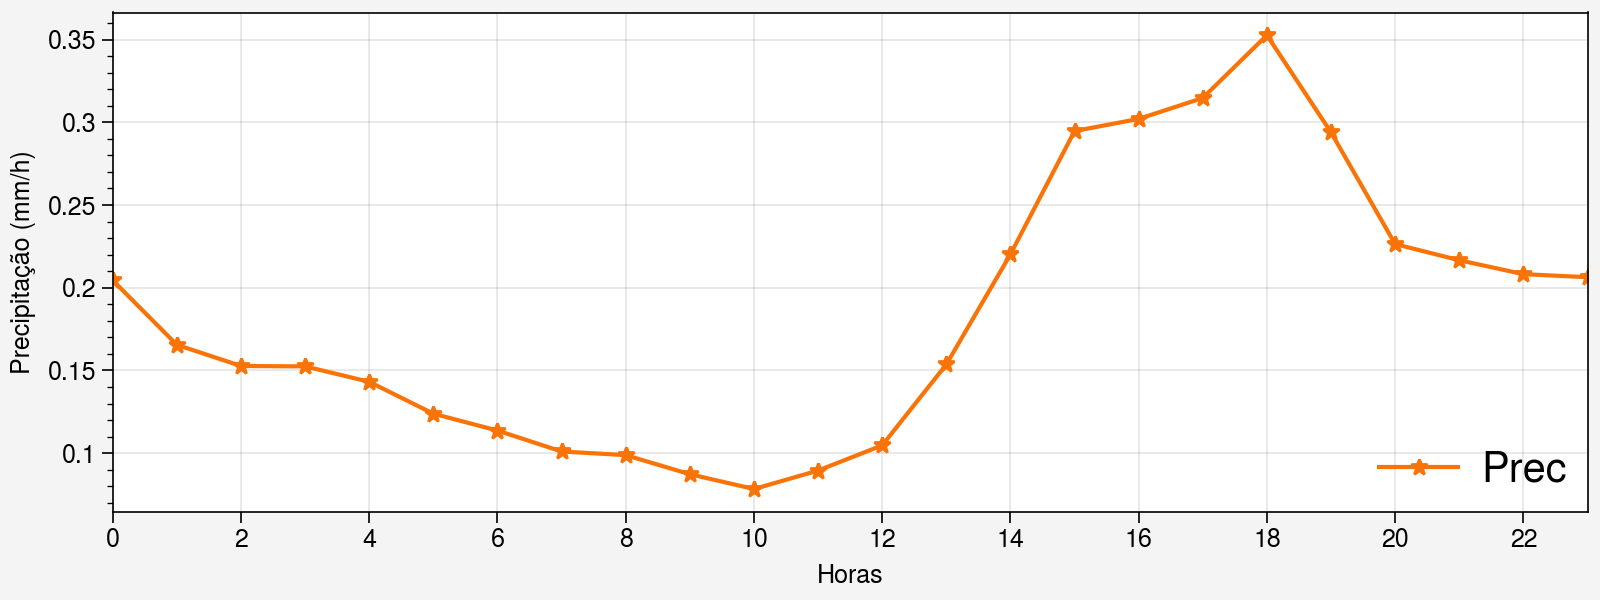

In [ ]:
# cria moldura da figura
fig, ax = plot.subplots(figsize=(8, 3), sharey=False, tight=True)

# plota a precipitação
ax.plot(plot.arange(0, 23, 1), horaria_climatologica['Prec'], color='orange', marker='*')

# formatação dos eixos X e Y
ax.format(xlabel='Horas', ylabel='Precipitação (mm/h)', xticks=2, xtickminor=False)

# legendas
ax.legend(frameon=False, loc='lr', prop={'size': 15})

# salva figura
fig.save(f'{dir}/output/Fig1a_horario_climatologia_precipitacao.jpg', dpi=300)

# exibe a figura na tela
plot.show()

In [ ]:
np.arange(0, 23, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

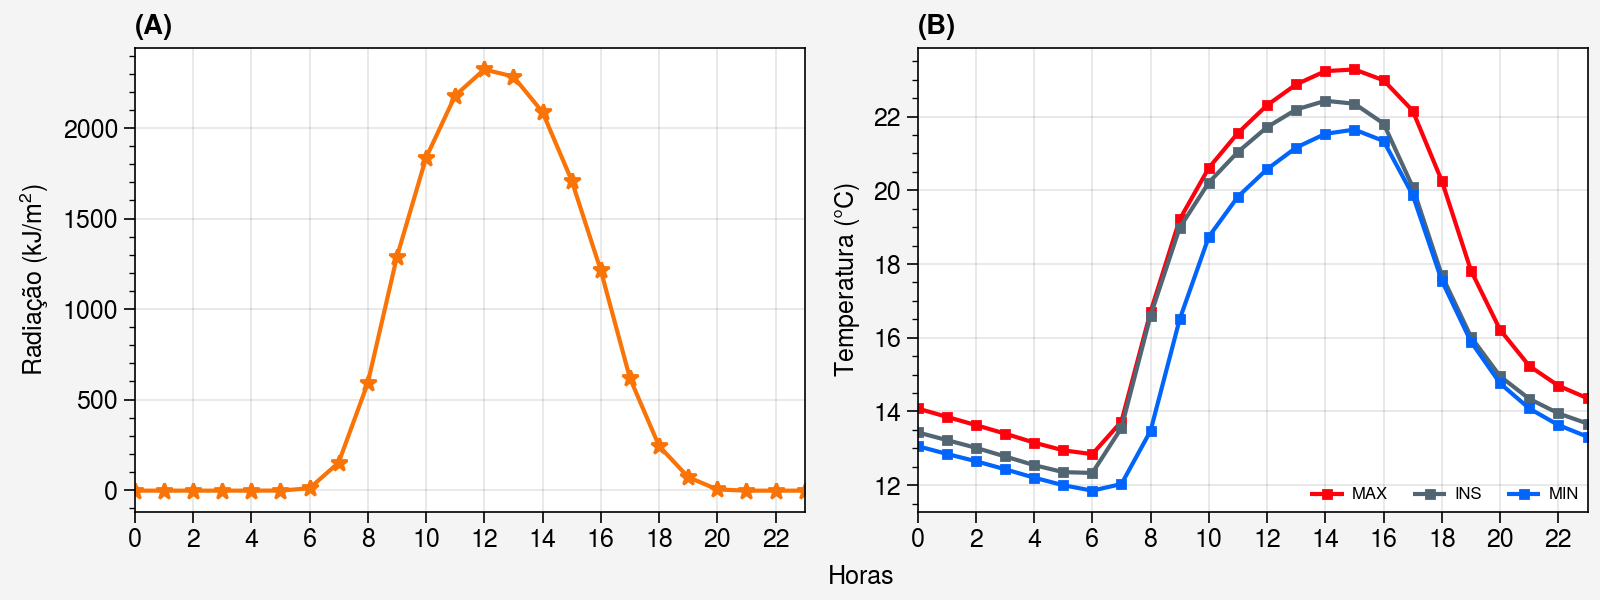

In [ ]:
# cria moldura da figura
fig, ax = plot.subplots(figsize=(8, 3), ncols=2, sharey=False, tight=True, abc='(A)')

# radiação
ax[0].plot(plot.arange(0, 23, 1), horaria_climatologica['Rad'], color='orange', marker='*')
ax[0].format(xlabel='Horas', ylabel='Radiação (kJ/$m^{2}$)', xticks=2, xtickminor=False)

# temperaturas
ax[1].plot(plot.arange(0, 23, 1), horaria_climatologica['Tmax'], color='bright red', marker='s', markersize=3, label='MAX')
ax[1].plot(plot.arange(0, 23, 1), horaria_climatologica['Tins'], color='slate', marker='s', markersize=3, label='INS')
ax[1].plot(plot.arange(0, 23, 1), horaria_climatologica['Tmin'], color='bright blue', marker='s', markersize=3, label='MIN')
ax[1].format(xlabel='Horas', ylabel='Temperatura ($\degree$C)', xticks=2, xtickminor=False)

# legendas
ax[1].legend(frameon=False, loc='lr', prop={'size': 6})

# salva figura
fig.save(f'{dir}/output/Fig1b_horario_climatologia_radiacao_temperatura.jpg', dpi=300)

# exibe a figura na tela
plot.show()

# **PARTE 4):**  Ciclo Diário: total

In [ ]:
diaria

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2006-12-01 00:00:00-02:00,19.900000,20.650000,19.337500,70.555556,73.125000,67.750000,14.288889,14.750000,13.900000,874.244444,874.412500,874.025000,1.833333,114.111111,5.550000,478.833333,1.0
2006-12-02 00:00:00-02:00,18.429167,19.291667,17.470833,77.208333,81.500000,73.000000,13.916667,14.612500,13.237500,874.950000,875.200000,874.745833,1.050000,121.708333,3.591667,1268.058333,0.0
2006-12-03 00:00:00-02:00,20.012500,20.975000,19.320833,78.958333,82.708333,74.625000,15.895833,16.537500,15.295833,874.754167,874.962500,874.554167,1.100000,143.333333,3.704167,933.254167,0.0
2006-12-04 00:00:00-02:00,20.326087,21.047826,19.621739,82.695652,86.086957,79.434783,17.095652,17.713043,16.569565,874.460870,874.743478,874.217391,1.539130,139.173913,4.991304,682.465217,18.8
2006-12-05 00:00:00-02:00,17.973684,18.526316,17.652632,92.947368,95.000000,89.578947,16.784211,17.242105,16.442105,875.163158,875.384211,875.021053,0.700000,148.210526,3.168421,377.447368,19.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-17 00:00:00-03:00,17.229167,18.166667,16.312500,74.333333,79.000000,69.541667,12.079167,13.050000,11.104167,875.383333,875.595833,875.204167,0.725000,202.958333,2.491667,1323.829167,0.0
2022-11-18 00:00:00-03:00,16.887500,17.875000,16.004167,78.333333,82.208333,74.333333,12.700000,13.675000,12.037500,874.887500,875.108333,874.658333,0.625000,164.208333,2.450000,1019.687500,0.0
2022-11-19 00:00:00-03:00,17.287500,18.070833,16.483333,76.041667,80.250000,71.916667,12.345833,13.254167,11.400000,875.479167,875.700000,875.245833,0.533333,167.333333,2.454167,1179.670833,0.0
2022-11-20 00:00:00-03:00,17.812500,19.000000,16.787500,76.875000,81.458333,71.916667,13.279167,14.150000,12.612500,875.650000,875.837500,875.454167,0.562500,177.875000,3.112500,884.983333,0.0


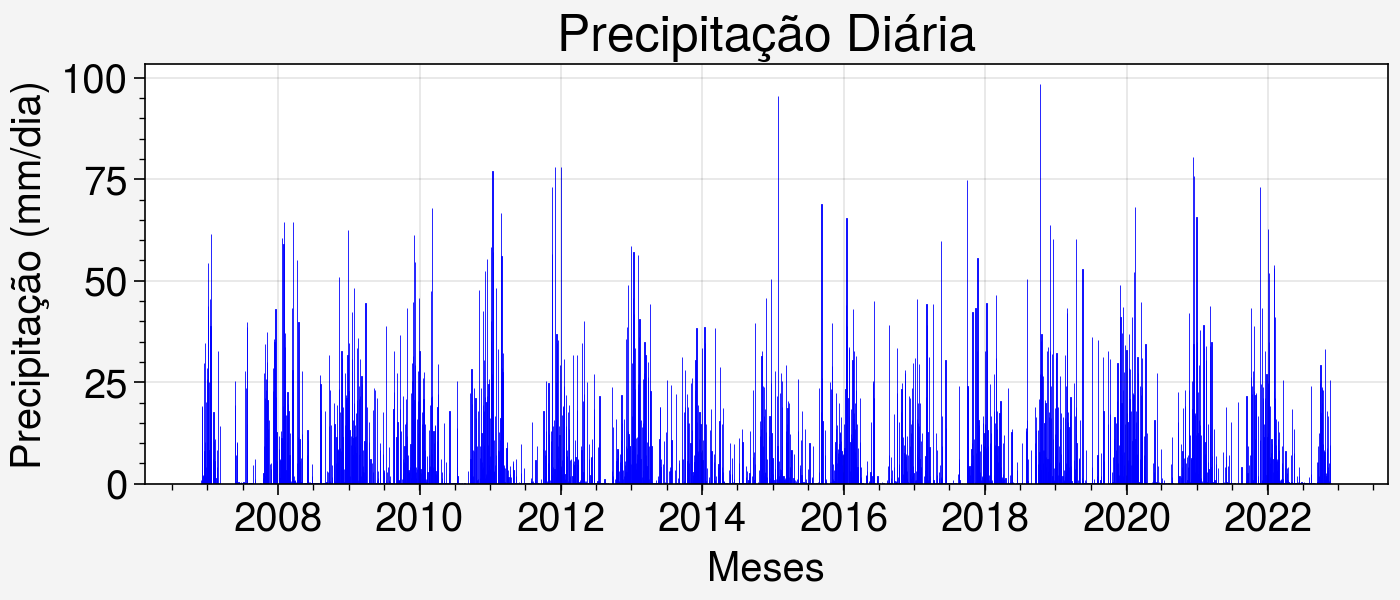

In [ ]:
# cria a moldura da figura
fig, ax = plot.subplots(figsize=(7, 3), tight=True)

# plota gráfico de barras
ax.bar(diaria['Prec'].index, diaria['Prec'], color='blue')

# formato dos eixos
ax.format(title='Precipitação Diária', xlabel='Meses', ylabel='Precipitação (mm/dia)',
          small='20px', large='25px', xrotation=0)

# salva figura
fig.save(f'{dir}/output/Fig2_diario_precipitacao.jpg', dpi=300)

# exibe figura na tela
plot.show()

# **PARTE 5):**  Ciclo Mensal: total e climatológica

**Mensal Total**

In [ ]:
mensal

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2006-12-31 00:00:00-02:00,19.438292,20.107080,18.830236,84.855670,88.209440,81.407080,16.602209,17.203392,16.091150,874.401620,874.632743,874.174484,1.089691,146.518409,3.857080,761.489691,202.0
2007-01-31 00:00:00-02:00,18.980396,19.491287,18.520990,90.843564,93.354455,87.952475,17.320000,17.797228,16.859208,873.254455,873.473861,873.016040,0.859208,172.340594,3.595446,504.189109,429.6
2007-02-28 00:00:00-03:00,19.380581,20.188022,18.646824,82.838475,86.529946,78.711434,16.060254,16.734301,15.391107,874.390381,874.595463,874.174229,0.892922,152.647913,3.471869,799.253358,100.4
2007-03-31 00:00:00-03:00,18.925862,19.988793,18.143966,78.051724,82.284483,72.991379,14.362931,15.317241,13.581897,877.681897,877.875862,877.473276,0.619828,175.939655,2.745690,918.156897,14.4
2007-04-30 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 00:00:00-03:00,12.899328,13.950134,11.935887,79.233871,82.333333,75.991935,8.558199,9.394355,7.826344,878.988844,879.186828,878.798925,0.395699,207.510753,1.665995,657.548790,6.6
2022-08-31 00:00:00-03:00,13.991801,14.926075,13.122312,73.936828,77.400538,70.442204,8.582392,9.306452,7.952957,878.285618,878.503360,878.063844,0.497849,178.698925,2.408199,638.323656,29.4
2022-09-30 00:00:00-03:00,15.901669,16.782197,15.086092,76.454798,79.873435,72.901252,10.995410,11.633241,10.393602,876.560501,876.802225,876.322114,0.537830,164.432545,2.620862,664.507371,128.2
2022-10-31 00:00:00-03:00,18.216801,19.050606,17.440511,80.600806,83.954240,76.928668,14.253898,15.009556,13.527725,875.544758,875.810363,875.289367,0.576613,174.490591,2.897577,785.729435,212.8


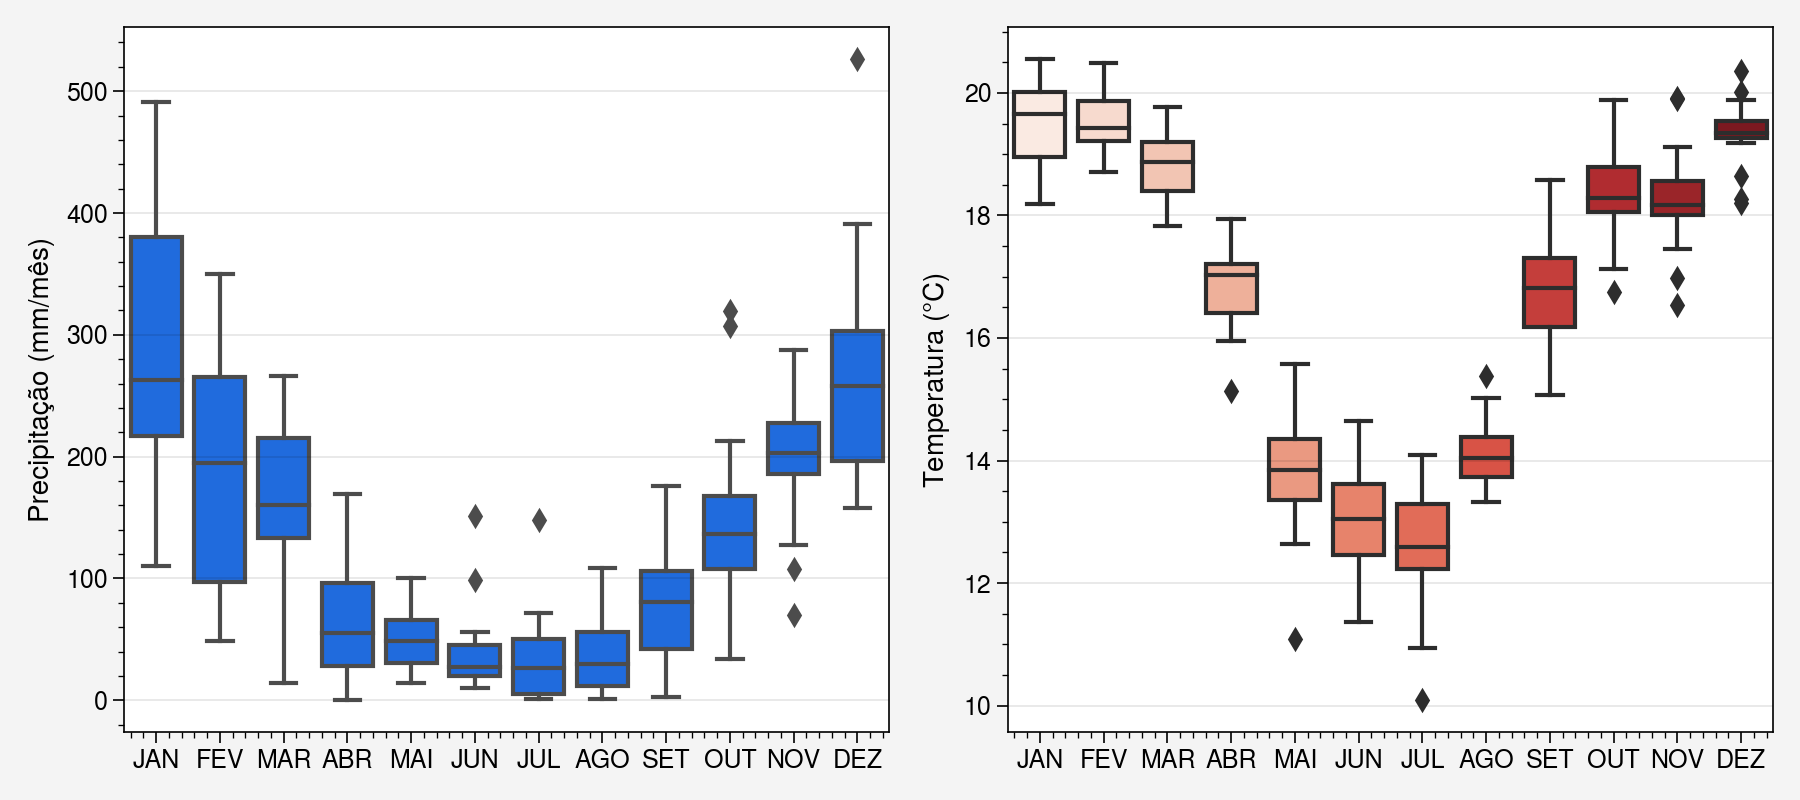

In [ ]:
# cria moldura da figura
fig, ax = plt.subplots(figsize=(9, 4), ncols=2)

# criar boxplot de precipitação mensal
sns.boxplot(x=mensal.index.month, y=mensal['Prec'], ax=ax[0], color='bright blue')
ax[0].set_ylabel('Precipitação (mm/mês)', fontsize=10)
ax[0].set_xticklabels(['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ'])

# boxplot de temperatura mensal
sns.boxplot(x=mensal.index.month, y=mensal['Tins'], ax=ax[1], palette='Reds')
ax[1].set_ylabel('Temperatura ($\degree$C)', fontsize=10)
ax[1].set_xticklabels(['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ'])

# salva figura
plt.savefig(f'{dir}/output/Fig3a_mensal_precipitacao.jpg', dpi=300, bbox_inches='tight')

# exibe figura na tela
plt.tight_layout()
plt.show()

**Mensal climatológica**

In [ ]:
mensal_climatologia

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
1,19.502896,20.214124,18.857897,84.406131,87.477923,81.081824,16.476595,17.133767,15.888973,874.612085,874.841012,874.382879,0.782960,162.883376,3.232809,719.167619,291.0125
2,19.500769,20.261134,18.809260,83.464592,86.679030,80.022438,16.271171,16.954063,15.659621,874.898739,875.128766,874.673816,0.746700,163.617510,3.102180,734.973858,192.6625
3,18.843326,19.625574,18.142023,84.041864,87.125883,80.670094,15.751274,16.439452,15.136319,875.437133,875.658443,875.216696,0.665953,172.515851,2.802451,718.722456,162.7875
4,16.822513,17.636198,16.074778,84.295863,87.242389,81.169299,13.780824,14.509868,13.128045,876.186034,876.391448,875.981372,0.587330,191.574922,2.427371,676.875061,68.3750
5,13.708305,14.525310,12.946166,85.452457,88.193286,82.521779,10.913405,11.652952,10.233127,877.119802,877.330292,876.911582,0.533954,201.812938,2.255257,553.938082,51.8875
6,13.006424,13.872090,12.203245,85.025616,87.788158,82.072380,10.105622,10.877817,9.393352,878.587811,878.787855,878.387564,0.543672,203.913234,2.262938,535.111749,40.3250
7,12.576552,13.513306,11.707704,80.747768,83.872015,77.456378,8.661643,9.464188,7.927486,879.161593,879.361799,878.964050,0.605321,199.449784,2.403895,595.973526,36.3625
8,14.097137,15.058837,13.191649,76.135231,79.726106,72.417624,9.074284,9.886134,8.323537,878.672327,878.888264,878.461391,0.721410,185.708705,2.776373,696.950445,38.8250
9,16.820469,17.769718,15.930020,72.984154,76.738357,69.109723,10.974314,11.749381,10.252378,877.219493,877.461516,876.986839,0.846601,173.886149,3.264684,780.565087,79.8625
10,18.314948,19.128674,17.548922,77.940660,81.387249,74.339589,13.778445,14.484939,13.130406,875.340773,875.594629,875.096340,0.878369,162.912168,3.474024,749.864367,145.3625


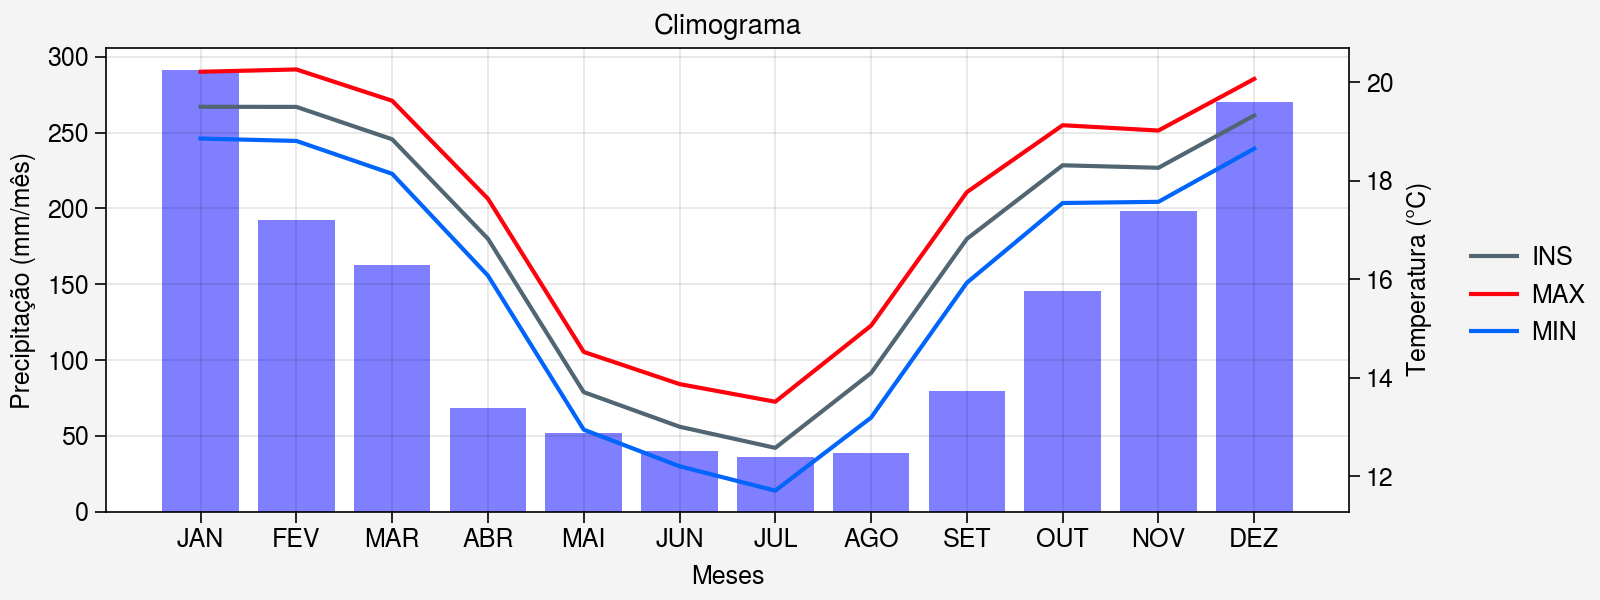

In [ ]:
# cria moldura da figura
fig, ax = plot.subplots(figsize=(8, 3), tight=True)

# eixos gêmeos em x
ax2 = ax.twinx()

# precipitação
ax.bar(plot.arange(1, 12, 1), mensal_climatologia['Prec'], color='blue', alpha=0.5)

# temperaturas
ax2.plot(plot.arange(1, 12, 1), mensal_climatologia['Tins'], color='slate', label='INS')
ax2.plot(plot.arange(1, 12, 1), mensal_climatologia['Tmax'], color='bright red', label='MAX')
ax2.plot(plot.arange(1, 12, 1), mensal_climatologia['Tmin'], color='bright blue', label='MIN')

# formatações
ax.format(title='Climograma',
          xlabel='Meses', ylabel='Precipitação (mm/mês)',
          xticklabels=['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN',
                       'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ'],
          xticks=plot.arange(1, 12, 1),
          xtickminor=False, ytickminor=False)

# formato do segundo eixo Y (a direita)
ax2.format(ylabel='Temperatura ($\degree$C)', ytickminor=False)

# legenda
ax2.legend(bbox_to_anchor=(1.2, 0.6), ncols=1, frameon=False)

# salva figura
fig.save(f'{dir}/output/Fig3b_mensal_climatologia_precipitacao.jpg', dpi=300)

# exibe figura na tela
plot.show()

Como podemos ver, criar *boxplots* é uma tarefa razoavelmente simples com Python e `Seaborn`. É possível fazer muito mais (veja a seção da [*Python Graph Gallery*](https://www.python-graph-gallery.com/boxplot/) sobre o tema), como *violinplots* e combinar *stripplots* nos gráficos.

# **PARTE 6):**  Ciclo Anual: total

In [ ]:
anual

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2006-12-31 00:00:00-02:00,19.438292,20.107080,18.830236,84.855670,88.209440,81.407080,16.602209,17.203392,16.091150,874.401620,874.632743,874.174484,1.089691,146.518409,3.857080,761.489691,202.0
2007-12-31 00:00:00-02:00,16.514470,17.364936,15.716506,79.267641,82.824060,75.463320,12.250295,12.978474,11.556077,876.185919,876.422459,875.955580,0.891156,181.433012,3.263578,723.216801,1344.4
2008-12-31 00:00:00-02:00,16.251701,17.028748,15.525939,82.968265,86.180843,79.515926,12.897934,13.603962,12.241226,875.612968,875.846192,875.390113,0.851655,176.524543,3.048841,683.047557,2000.4
2009-12-31 00:00:00-02:00,16.856060,17.600801,16.162619,84.992331,87.934073,81.786311,13.984571,14.658212,13.355614,875.527824,875.750944,875.308630,0.804601,181.156118,3.022971,675.152455,2113.6
2010-12-31 00:00:00-02:00,16.709649,17.541327,15.934727,80.939934,84.195272,77.459404,12.866016,13.583682,12.188478,875.860215,876.084150,875.641430,0.842926,176.914126,3.110426,725.503383,1495.2
2011-12-31 00:00:00-02:00,16.482793,17.310523,15.712169,80.723606,83.869401,77.370358,12.603405,13.322726,11.935638,875.524109,875.744755,875.309072,0.823069,180.668761,3.122920,703.326782,1732.8
2012-12-31 00:00:00-02:00,16.719590,17.554300,15.940996,81.065148,84.269507,77.686980,12.944317,13.682264,12.258765,876.369772,876.589304,876.150541,0.781344,175.478474,3.073721,732.611940,1389.2
2013-12-31 00:00:00-02:00,16.434265,17.216378,15.711980,83.540082,86.507044,80.354599,13.219858,13.915187,12.588421,876.129707,876.354621,875.908567,0.727886,176.989693,2.954021,688.067579,1908.2
2014-12-31 00:00:00-02:00,16.958169,17.849715,16.135510,78.120105,81.660996,74.477849,12.434079,13.211978,11.739667,876.807821,877.027472,876.591676,0.723507,179.432926,2.993777,771.203014,1004.4
2015-12-31 00:00:00-02:00,17.392600,18.204762,16.652929,82.392714,85.457120,79.102090,13.884584,14.590830,13.248921,876.767295,876.996460,876.541670,0.682346,175.914583,2.932614,684.128343,1299.6


In [ ]:
anual.index.year

Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64')

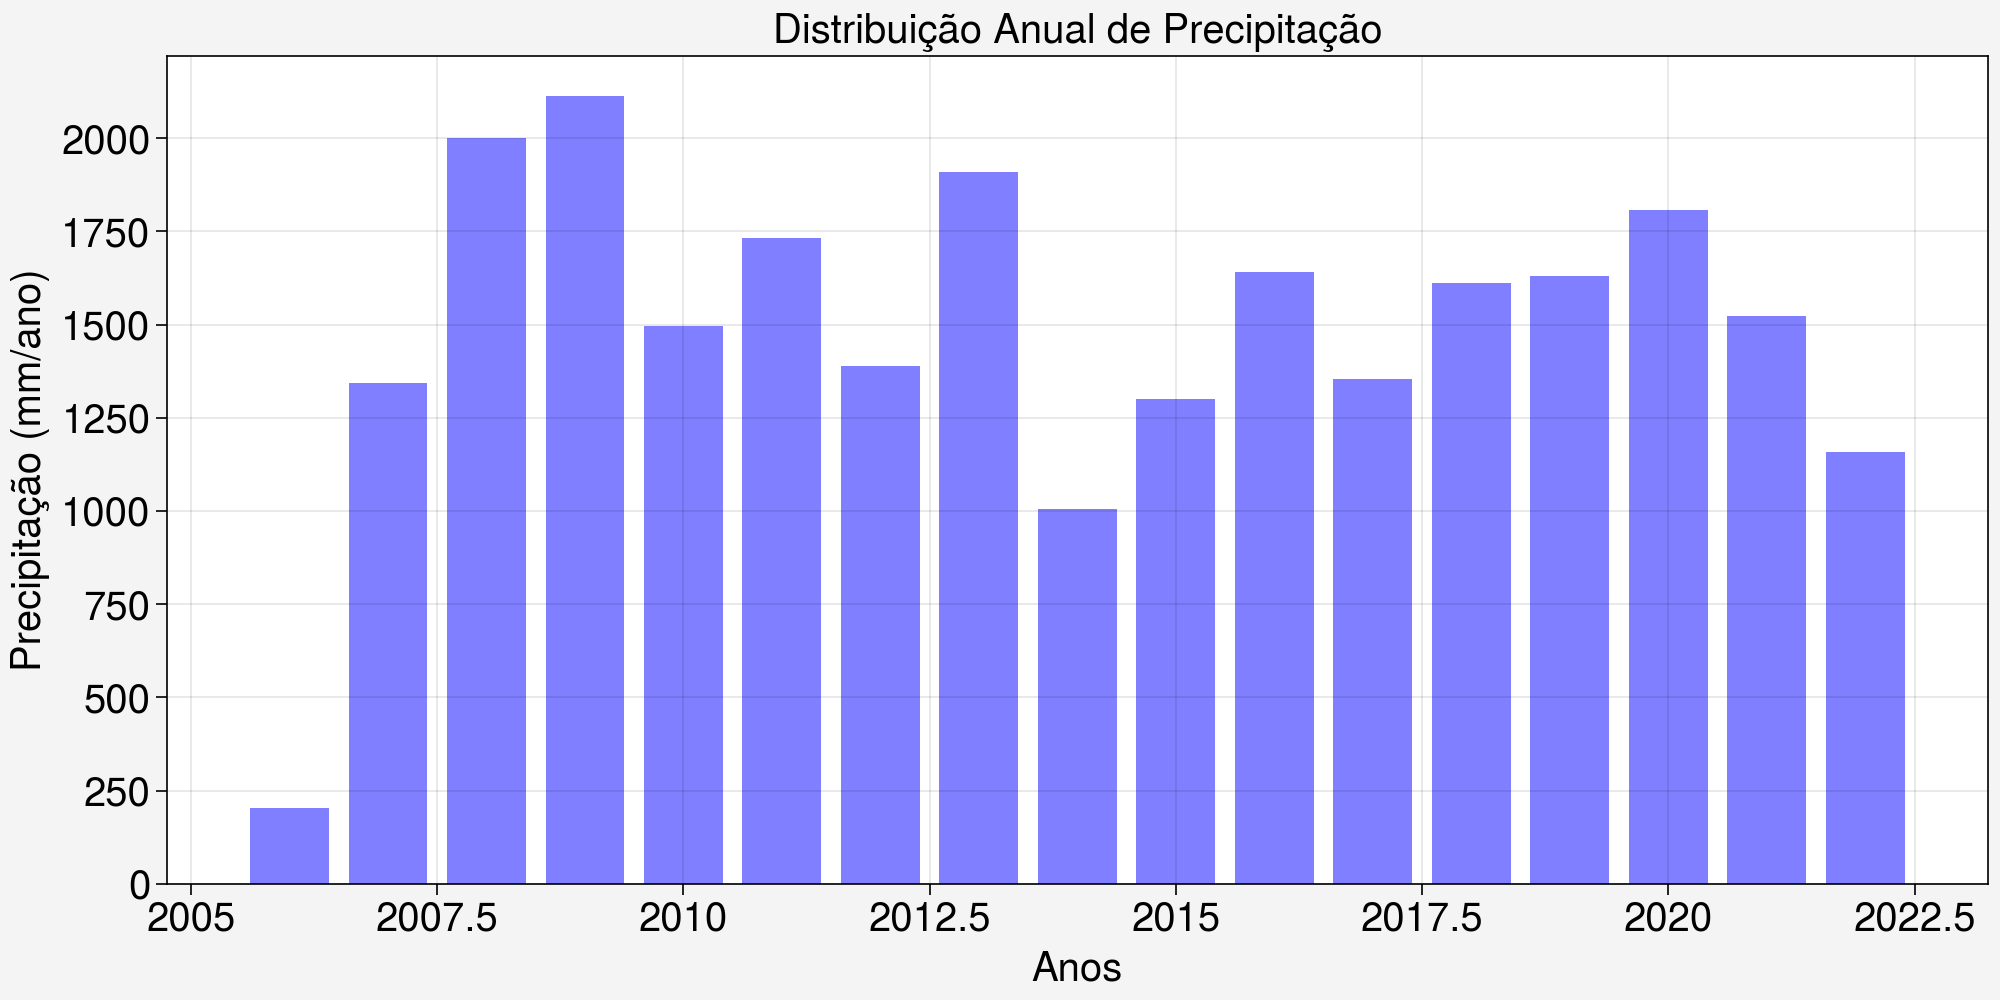

In [ ]:
# cria moldura da figura
fig, ax = plot.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(anual.index.year, anual['Prec'], color='blue', alpha=0.5)

# formatação do eixo
ax.format(title='Distribuição Anual de Precipitação', xlabel='Anos', ylabel='Precipitação (mm/ano)',
          small='20px', large='20px',
          xtickminor=False, ytickminor=False)

# salva figura
fig.save(f'{dir}/output/Fig4_anual_precipitacao.jpg', dpi=300)

# exibe figura na tela
plot.show()

# **PARTE 7):** Salvando a tabela num arquivo CSV

**Podemos `renomear` cada uma delas atribuindo uma lista a `ems_mensal.columns`. Isto é:**

In [ ]:
mensal.columns = ['Temp Inst (C)', 'Temp Max (C)', 'Temp Min (C)',
                  'Umid Rel Inst (%)', 'Umid Rel Max (%)', 'Umid Rel Min (%)',
                  'Temp Orv Inst (C)', 'Temp Orv Max (C)', 'Temp Orv Min (C)',
                  'Pressao Inst (hPa)', 'Pressao Max (hPa)', 'Pressao Min (hPa)',
                  'Velocidade (m/s)', 'Rajada (m/s)', 'Direcao',
                  'Radiacao', 'Precipitacao']

In [ ]:
mensal

,Temp Inst (C),Temp Max (C),Temp Min (C),Umid Rel Inst (%),Umid Rel Max (%),Umid Rel Min (%),Temp Orv Inst (C),Temp Orv Max (C),Temp Orv Min (C),Pressao Inst (hPa),Pressao Max (hPa),Pressao Min (hPa),Velocidade (m/s),Rajada (m/s),Direcao,Radiacao,Precipitacao
2006-12-31 00:00:00-02:00,19.438292,20.107080,18.830236,84.855670,88.209440,81.407080,16.602209,17.203392,16.091150,874.401620,874.632743,874.174484,1.089691,146.518409,3.857080,761.489691,202.0
2007-01-31 00:00:00-02:00,18.980396,19.491287,18.520990,90.843564,93.354455,87.952475,17.320000,17.797228,16.859208,873.254455,873.473861,873.016040,0.859208,172.340594,3.595446,504.189109,429.6
2007-02-28 00:00:00-03:00,19.380581,20.188022,18.646824,82.838475,86.529946,78.711434,16.060254,16.734301,15.391107,874.390381,874.595463,874.174229,0.892922,152.647913,3.471869,799.253358,100.4
2007-03-31 00:00:00-03:00,18.925862,19.988793,18.143966,78.051724,82.284483,72.991379,14.362931,15.317241,13.581897,877.681897,877.875862,877.473276,0.619828,175.939655,2.745690,918.156897,14.4
2007-04-30 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 00:00:00-03:00,12.899328,13.950134,11.935887,79.233871,82.333333,75.991935,8.558199,9.394355,7.826344,878.988844,879.186828,878.798925,0.395699,207.510753,1.665995,657.548790,6.6
2022-08-31 00:00:00-03:00,13.991801,14.926075,13.122312,73.936828,77.400538,70.442204,8.582392,9.306452,7.952957,878.285618,878.503360,878.063844,0.497849,178.698925,2.408199,638.323656,29.4
2022-09-30 00:00:00-03:00,15.901669,16.782197,15.086092,76.454798,79.873435,72.901252,10.995410,11.633241,10.393602,876.560501,876.802225,876.322114,0.537830,164.432545,2.620862,664.507371,128.2
2022-10-31 00:00:00-03:00,18.216801,19.050606,17.440511,80.600806,83.954240,76.928668,14.253898,15.009556,13.527725,875.544758,875.810363,875.289367,0.576613,174.490591,2.897577,785.729435,212.8


**Para formatar melhor a tabela, você pode remover o `index` de datas e criar novas colunas para os anos e meses.**

In [ ]:
# remover o índice de datas
nova_tabela = mensal.reset_index(drop=True)

# incluir uma coluna de danos na posição 1
nova_tabela.insert(0, 'Anos', mensal.index.year)

# incluir uma coluna de meses na posição 2
nova_tabela.insert(1, 'Meses', mensal.index.month)

In [ ]:
nova_tabela

,Anos,Meses,Temp Inst (C),Temp Max (C),Temp Min (C),Umid Rel Inst (%),Umid Rel Max (%),Umid Rel Min (%),Temp Orv Inst (C),Temp Orv Max (C),Temp Orv Min (C),Pressao Inst (hPa),Pressao Max (hPa),Pressao Min (hPa),Velocidade (m/s),Rajada (m/s),Direcao,Radiacao,Precipitacao
0,2006,12,19.438292,20.107080,18.830236,84.855670,88.209440,81.407080,16.602209,17.203392,16.091150,874.401620,874.632743,874.174484,1.089691,146.518409,3.857080,761.489691,202.0
1,2007,1,18.980396,19.491287,18.520990,90.843564,93.354455,87.952475,17.320000,17.797228,16.859208,873.254455,873.473861,873.016040,0.859208,172.340594,3.595446,504.189109,429.6
2,2007,2,19.380581,20.188022,18.646824,82.838475,86.529946,78.711434,16.060254,16.734301,15.391107,874.390381,874.595463,874.174229,0.892922,152.647913,3.471869,799.253358,100.4
3,2007,3,18.925862,19.988793,18.143966,78.051724,82.284483,72.991379,14.362931,15.317241,13.581897,877.681897,877.875862,877.473276,0.619828,175.939655,2.745690,918.156897,14.4
4,2007,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022,7,12.899328,13.950134,11.935887,79.233871,82.333333,75.991935,8.558199,9.394355,7.826344,878.988844,879.186828,878.798925,0.395699,207.510753,1.665995,657.548790,6.6
188,2022,8,13.991801,14.926075,13.122312,73.936828,77.400538,70.442204,8.582392,9.306452,7.952957,878.285618,878.503360,878.063844,0.497849,178.698925,2.408199,638.323656,29.4
189,2022,9,15.901669,16.782197,15.086092,76.454798,79.873435,72.901252,10.995410,11.633241,10.393602,876.560501,876.802225,876.322114,0.537830,164.432545,2.620862,664.507371,128.2
190,2022,10,18.216801,19.050606,17.440511,80.600806,83.954240,76.928668,14.253898,15.009556,13.527725,875.544758,875.810363,875.289367,0.576613,174.490591,2.897577,785.729435,212.8


**E agora, você pode `salvar` o `DataFrame` em formato csv com `.to_csv()`:**

In [ ]:
mensal.to_csv(f'{dir}/output/tabela_mensal.csv')